In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

books_path = "/Users/anjali/Downloads/books_data-2/books.csv" 
ratings_path = "/Users/anjali/Downloads/books_data-2/ratings.csv"
users_path = "/Users/anjali/Downloads/books_data-2/users.csv"

try:
    books_df = pd.read_csv(books_path, sep=";", on_bad_lines='skip', encoding="latin-1")
    ratings_df = pd.read_csv(ratings_path, sep=";", on_bad_lines='skip', encoding="latin-1")
    users_df = pd.read_csv(users_path, sep=";", on_bad_lines='skip', encoding="latin-1")

    print(books_df.head())
    print(ratings_df.head())
    print(users_df.head())

except FileNotFoundError:
    print("Error: One or more CSV files not found. Please check the paths.")
except Exception as e:
    print(f"An error occurred: {e}")


/var/folders/xc/5wr9ppb96715mmh6s3fk45bw0000gn/T/ipykernel_80934/759644877.py:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(books_path, sep=";", on_bad_lines='skip', encoding="latin-1")


         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/

/var/folders/xc/5wr9ppb96715mmh6s3fk45bw0000gn/T/ipykernel_80934/668033601.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(books_path, sep=";", on_bad_lines='skip', encoding="latin-1")


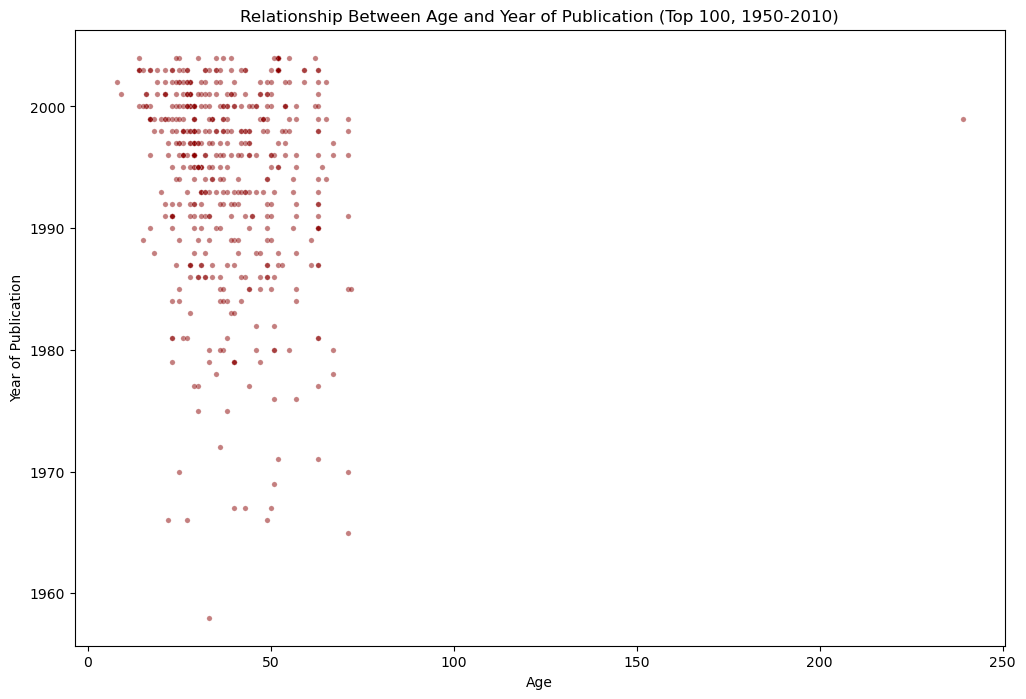

In [4]:
books_df = pd.read_csv(books_path, sep=";", on_bad_lines='skip', encoding="latin-1")
ratings_df = pd.read_csv(ratings_path, sep=";", on_bad_lines='skip', encoding="latin-1")
users_df = pd.read_csv(users_path, sep=";", on_bad_lines='skip', encoding="latin-1")

books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')
books_df.loc[(books_df['Year-Of-Publication'] > 2023) | (books_df['Year-Of-Publication'] < 1000), 'Year-Of-Publication'] = np.nan
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].replace(0, np.nan)
publishers = ['DK Publishing Inc', 'Gallimard']
books_df.loc[books_df['Year-Of-Publication'].isna() & books_df['Publisher'].isin(publishers), 'Year-Of-Publication'] = np.nan

merged_df = pd.merge(ratings_df, books_df, left_on='ISBN', right_on='ISBN', how='inner')
merged_df = pd.merge(merged_df, users_df, left_on='User-ID', right_on='User-ID', how='inner')


merged_df['Age'] = pd.to_numeric(merged_df['Age'], errors='coerce')


merged_df = merged_df.dropna(subset=['Age', 'Year-Of-Publication'])


average_ratings = merged_df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(500)


top_100_books = average_ratings.index
filtered_df = merged_df[merged_df['Book-Title'].isin(top_100_books) & (merged_df['Year-Of-Publication'] >= 1950) & (merged_df['Year-Of-Publication'] <= 2010)]


plt.figure(figsize=(12, 8)) 
sns.scatterplot(x='Age', y='Year-Of-Publication', data=filtered_df, alpha=0.5, s=15, color='darkred') 
plt.title('Relationship Between Age and Year of Publication (Top 100, 1950-2010)')
plt.xlabel('Age')
plt.ylabel('Year of Publication')
plt.show()

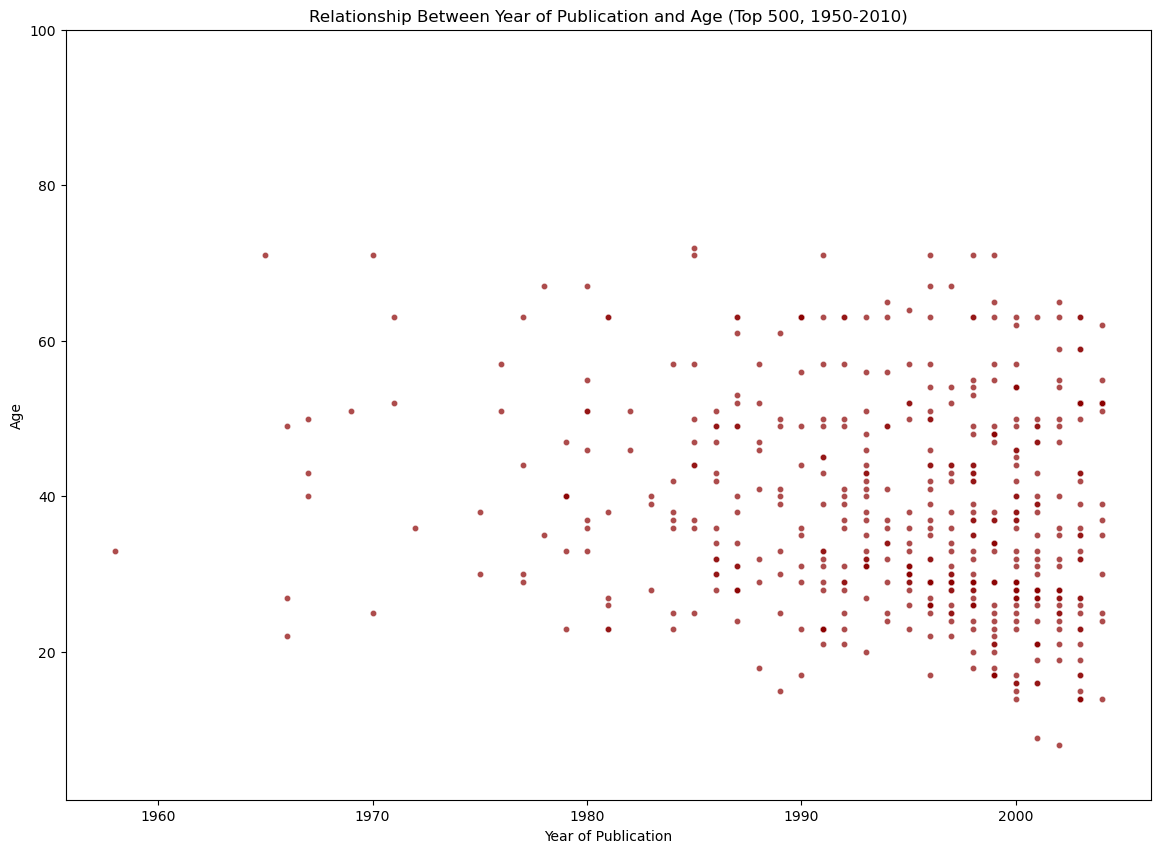

In [5]:
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')
books_df.loc[(books_df['Year-Of-Publication'] > 2023) | (books_df['Year-Of-Publication'] < 1000), 'Year-Of-Publication'] = np.nan
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].replace(0, np.nan)
publishers = ['DK Publishing Inc', 'Gallimard']
books_df.loc[books_df['Year-Of-Publication'].isna() & books_df['Publisher'].isin(publishers), 'Year-Of-Publication'] = np.nan

merged_df = pd.merge(ratings_df, books_df, left_on='ISBN', right_on='ISBN', how='inner')
merged_df = pd.merge(merged_df, users_df, left_on='User-ID', right_on='User-ID', how='inner')

merged_df['Age'] = pd.to_numeric(merged_df['Age'], errors='coerce')

merged_df = merged_df.dropna(subset=['Age', 'Year-Of-Publication'])

average_ratings = merged_df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(500)

top_500_books = average_ratings.index
filtered_df = merged_df[merged_df['Book-Title'].isin(top_500_books) & (merged_df['Year-Of-Publication'] >= 1950) & (merged_df['Year-Of-Publication'] <= 2010)]

plt.figure(figsize=(14, 10))
sns.scatterplot(x='Year-Of-Publication', y='Age', data=filtered_df, alpha=0.7, s=20, color='darkred')
plt.title('Relationship Between Year of Publication and Age (Top 500, 1950-2010)')
plt.xlabel('Year of Publication')
plt.ylabel('Age')
plt.ylim(1, 100)
plt.show()

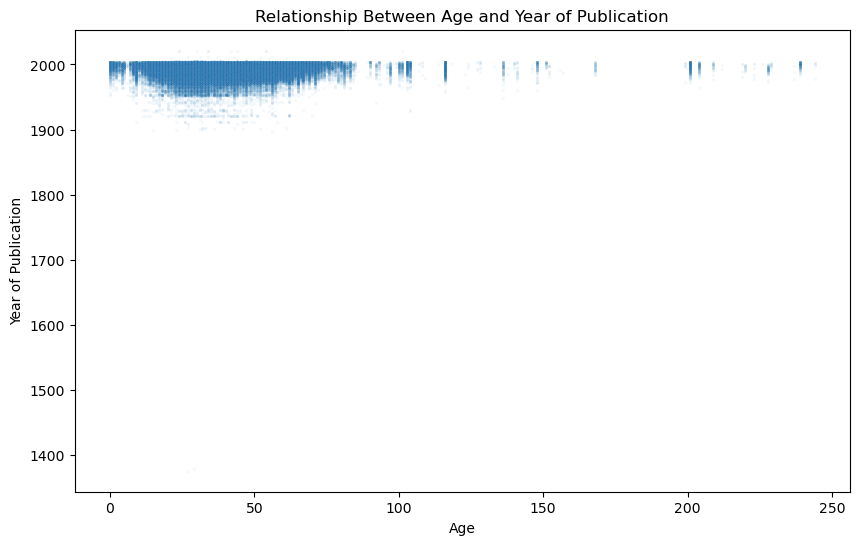

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Year-Of-Publication', data=merged_df, alpha=0.05, s=5)
plt.title('Relationship Between Age and Year of Publication')
plt.xlabel('Age')
plt.ylabel('Year of Publication')
plt.show()

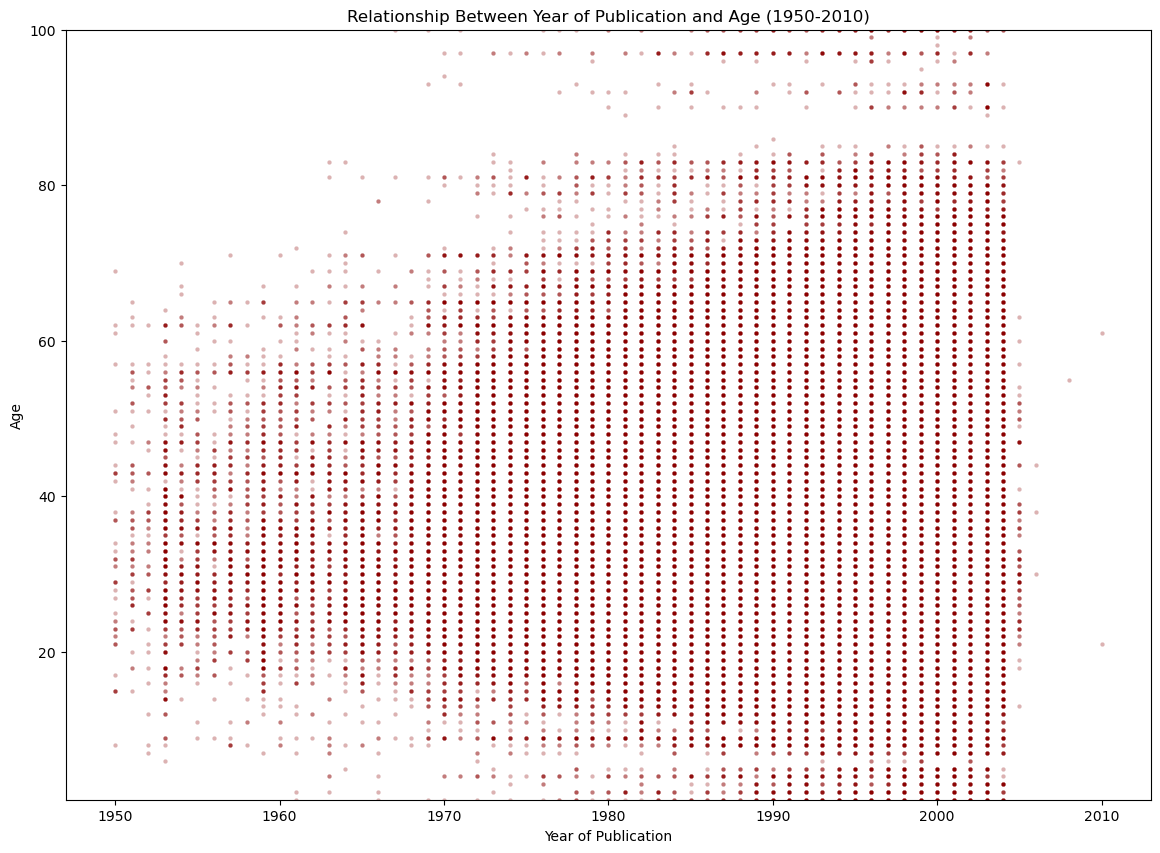

In [49]:
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')
books_df.loc[(books_df['Year-Of-Publication'] > 2023) | (books_df['Year-Of-Publication'] < 1000), 'Year-Of-Publication'] = np.nan
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].replace(0, np.nan)
publishers = ['DK Publishing Inc', 'Gallimard']
books_df.loc[books_df['Year-Of-Publication'].isna() & books_df['Publisher'].isin(publishers), 'Year-Of-Publication'] = np.nan


merged_df = pd.merge(ratings_df, books_df, left_on='ISBN', right_on='ISBN', how='inner')
merged_df = pd.merge(merged_df, users_df, left_on='User-ID', right_on='User-ID', how='inner')


merged_df['Age'] = pd.to_numeric(merged_df['Age'], errors='coerce')


merged_df = merged_df.dropna(subset=['Age', 'Year-Of-Publication'])


filtered_df = merged_df[(merged_df['Year-Of-Publication'] >= 1950) & (merged_df['Year-Of-Publication'] <= 2010)]


plt.figure(figsize=(14, 10))
sns.scatterplot(x='Year-Of-Publication', y='Age', data=filtered_df, alpha=0.3, s=10, color='darkred') 
plt.title('Relationship Between Year of Publication and Age (1950-2010)')
plt.xlabel('Year of Publication')
plt.ylabel('Age')
plt.ylim(1, 100)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


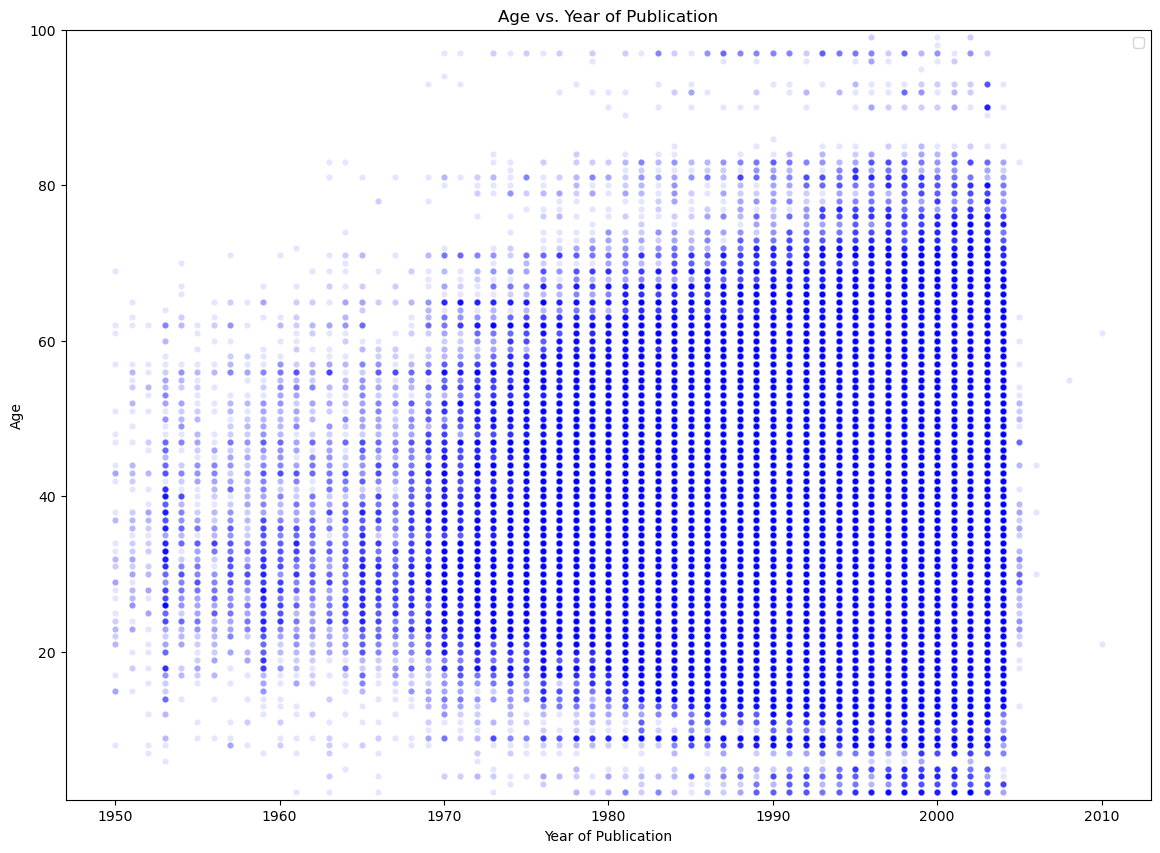

In [57]:
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')
books_df.loc[(books_df['Year-Of-Publication'] > 2023) | (books_df['Year-Of-Publication'] < 1000), 'Year-Of-Publication'] = np.nan
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].replace(0, np.nan)
publishers = ['DK Publishing Inc', 'Gallimard']
books_df.loc[books_df['Year-Of-Publication'].isna() & books_df['Publisher'].isin(publishers), 'Year-Of-Publication'] = np.nan


merged_df = pd.merge(ratings_df, books_df, left_on='ISBN', right_on='ISBN', how='inner')
merged_df = pd.merge(merged_df, users_df, left_on='User-ID', right_on='User-ID', how='inner')


merged_df['Age'] = pd.to_numeric(merged_df['Age'], errors='coerce')

merged_df = merged_df.dropna(subset=['Age', 'Year-Of-Publication'])

filtered_df = merged_df[(merged_df['Year-Of-Publication'] >= 1950) & (merged_df['Year-Of-Publication'] <= 2010) & (merged_df['Age'] > 1) & (merged_df['Age'] < 100)]

plt.figure(figsize=(14, 10))
sns.scatterplot(x='Year-Of-Publication', y='Age', data=filtered_df, alpha=0.1, s=20, color='blue')
plt.title('Age vs. Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Age')
plt.ylim(1, 100) 
plt.legend() 
plt.show()